In [1]:
import os
import mne
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
import numpy as np
import pandas as pd

In [2]:
dfs2ddm = pd.read_csv('../Data/results/dfs2ddm.csv')
m5trc = pd.read_csv('../Data/model_trace/m5_traces.csv')

In [3]:
dics = {'m1':-2916.0147199061457,
'm2':-2988.458531880192,
'm3':-3396.701532816427,
'm4':-3457.8257044931247,
'm5':-3461.374020409342,
'slps':-3594.4240060411885,
'ams':-3546.2500963683888,
'pams':-3543.514690086374,
'slp_bin': -3573.4528219288213,
'am_bin':-3539.030375176697,
'pam_bin':-3557.3585149965083,
'slp_cond':-3483.455154472238,
'am_cond':-3466.066781123778,
'pam_cond':-3477.0241364063445}
dics = pd.DataFrame([(k, v) for k, v in dics.items()], columns=['model', 'value'])
mdics = dics.iloc[5:, :].reset_index(drop=True)
mdics['feature'] = ['slp', 'am', 'pam', 'slp', 'am', 'pam', 'slp', 'am', 'pam']
mdics['type'] = ['trial', 'trial', 'trial', 'bin', 'bin', 'bin', 'cond', 'cond', 'cond']   


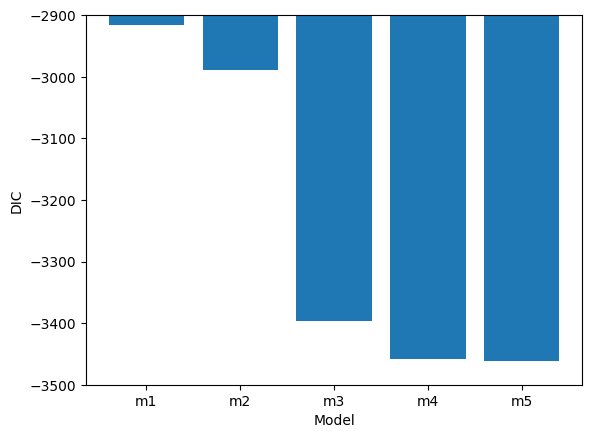

In [4]:
plt.bar(dics.iloc[0:5,0], dics.iloc[0:5,1])
plt.ylabel('DIC')
plt.xlabel('Model')
plt.ylim(-3500, -2900)
plt.savefig('../Figure/beh_ddm_dic.pdf', dpi=1000)

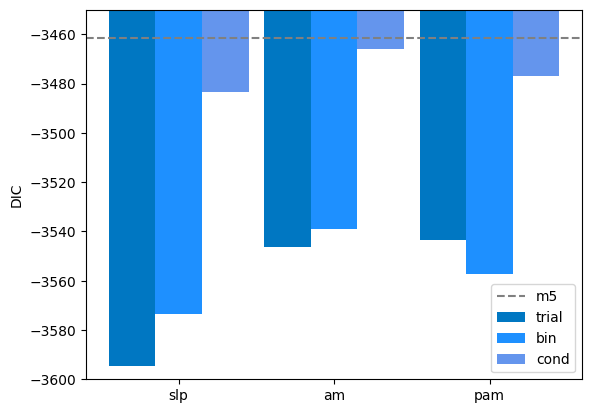

In [5]:
# Set width of bars
barWidth = 0.3
 
# Set position of bar on X axis
r1 = np.arange(3)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Set color palette to blue
colors = ['#0077c2', '#1e90ff', '#6495ed']

# Plot the bars
plt.bar(r1, mdics.loc[mdics['type']=='trial', 'value'], width=barWidth, color=colors[0], label='trial')   
plt.bar(r2, mdics.loc[mdics['type']=='cond', 'value'], width=barWidth, color=colors[1], label='cond')
plt.bar(r3, mdics.loc[mdics['type']=='cond', 'value'], width=barWidth, color=colors[2], label='cond')

# Set the x-tick labels and y-label
plt.xticks([r + barWidth for r in range(3)], ['slp', 'am', 'pam'])
plt.ylabel('DIC')

# Set the y-axis limits and add a horizontal line
plt.ylim(-3600, -3450)
plt.axhline(y=-3461.374020409342, color='grey', linestyle='--',label='m5')

# Add legend and save the figure
plt.legend()
plt.savefig('../Figure/beh_ddm_dic2.pdf', dpi=1000)



# ddm and cpp

In [6]:
vint = m5trc.filter(regex='^v(?!.*(sub|std)).*$').iloc[:,0]
vslp = m5trc.filter(regex='^v(?!.*(sub|std)).*$').iloc[:,1]
vlow_sub = m5trc.filter(regex='^v_In.*sub.*$').mean(axis=0).to_numpy()
vhigh_sub = m5trc.filter(regex='^v_In.*sub.*$').mean(axis=0).to_numpy() + m5trc.filter(regex='^v_C.*sub.*$').mean(axis=0).to_numpy()
slp_v = dfs2ddm.groupby(['subj_idx','coherence'])['slp','pam','am','rt'].mean().reset_index()
slp_v.loc[(slp_v['coherence'] == 'low'),'v'] = vlow_sub
slp_v.loc[(slp_v['coherence'] == 'high'),'v'] = vhigh_sub

C:\Users\liuyikang\AppData\Local\Temp\ipykernel_4232\2915958757.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  slp_v = dfs2ddm.groupby(['subj_idx','coherence'])['slp','pam','am','rt'].mean().reset_index()


In [7]:
print(f"the correlation between **slp** and v is: {stats.pearsonr(slp_v['slp'],slp_v['v'])}")
print(f"the correlation between **pam** and v is: {stats.pearsonr(slp_v['pam'],slp_v['v'])}")
print(f"the correlation between **am** and v is: {stats.pearsonr(slp_v['am'],slp_v['v'])}")
print(f"the correlation between **rt** and v is: {stats.pearsonr(slp_v['rt'],slp_v['v'])}")

the correlation between **slp** and v is: PearsonRResult(statistic=0.37281437565870423, pvalue=0.035598495259799634)
the correlation between **pam** and v is: PearsonRResult(statistic=0.24224606865566153, pvalue=0.1816056422967443)
the correlation between **am** and v is: PearsonRResult(statistic=0.2177205988432988, pvalue=0.2312918325241067)
the correlation between **rt** and v is: PearsonRResult(statistic=-0.518719300164701, pvalue=0.0023526279617059535)


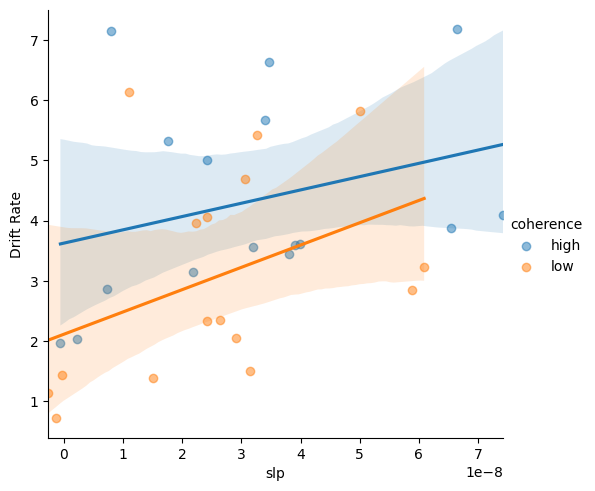

In [8]:
sns.lmplot(x='slp', y='v', data=slp_v, hue = 'coherence', scatter_kws={'alpha':0.5})
plt.ylabel('Drift Rate')
plt.show()

# multiverse

In [3]:
slps = pd.read_csv('../Data/model_trace/m_slps_traces.csv')
ams = pd.read_csv('../Data/model_trace/m_ams_traces.csv')
pams = pd.read_csv('../Data/model_trace/m_pams_traces.csv')
slp_cond = pd.read_csv('../Data/model_trace/m_slp_bin_traces.csv')
am_bin = pd.read_csv('../Data/model_trace/m_am_bin_traces.csv')
pam_bin = pd.read_csv('../Data/model_trace/m_pam_bin_traces.csv')
slp_cond = pd.read_csv('../Data/model_trace/m_slp_cond_traces.csv')
am_cond = pd.read_csv('../Data/model_trace/m_am_cond_traces.csv')
pam_cond = pd.read_csv('../Data/model_trace/m_pam_cond_traces.csv')

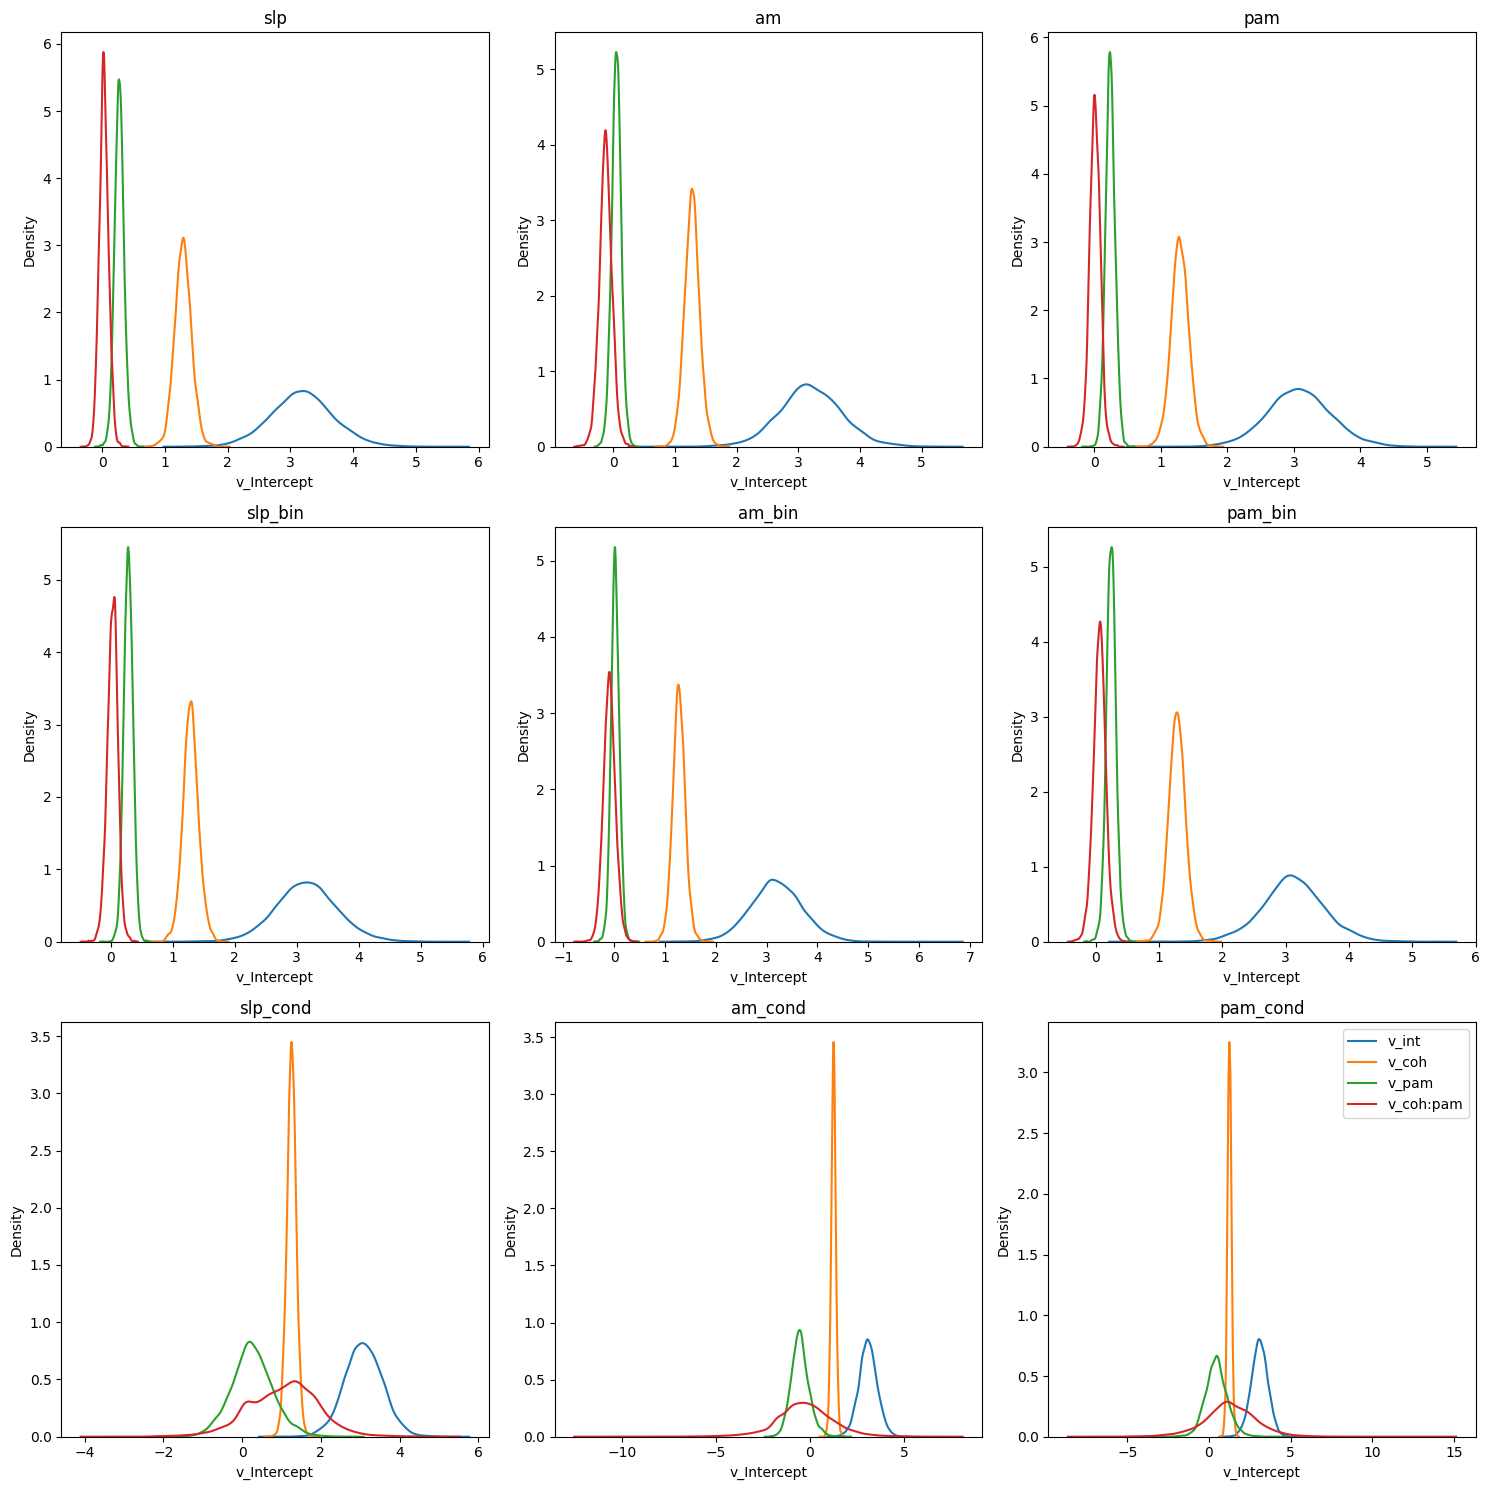

In [10]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.kdeplot(slps.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,0],label='v_int')
sns.kdeplot(slps.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,1],label='v_coh')
sns.kdeplot(slps.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,2],label='v_slp')
sns.kdeplot(slps.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,3],label='v_coh:slp')
plt.title('slp')
plt.subplot(3,3,2)
sns.kdeplot(ams.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,0],label='v_int')
sns.kdeplot(ams.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,1],label='v_coh')
sns.kdeplot(ams.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,2],label='v_am')
sns.kdeplot(ams.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,3],label='v_coh:am')
plt.title('am')
plt.subplot(3,3,3)
sns.kdeplot(pams.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,0],label='v_int')
sns.kdeplot(pams.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,1],label='v_coh')
sns.kdeplot(pams.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,2],label='v_pam')
sns.kdeplot(pams.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,3],label='v_coh:pam')
plt.title('pam')
plt.subplot(3,3,4)
sns.kdeplot(slp_bin.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,0],label='v_int')
sns.kdeplot(slp_bin.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,1],label='v_coh')
sns.kdeplot(slp_bin.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,2],label='v_slp')
sns.kdeplot(slp_bin.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,3],label='v_coh:slp')
plt.title('slp_bin')
plt.subplot(3,3,5)
sns.kdeplot(am_bin.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,0],label='v_int')
sns.kdeplot(am_bin.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,1],label='v_coh')
sns.kdeplot(am_bin.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,2],label='v_am')
sns.kdeplot(am_bin.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,3],label='v_coh:am')
plt.title('am_bin')
plt.subplot(3,3,6)
sns.kdeplot(pam_bin.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,0],label='v_int')
sns.kdeplot(pam_bin.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,1],label='v_coh')
sns.kdeplot(pam_bin.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,2],label='v_pam')
sns.kdeplot(pam_bin.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,3],label='v_coh:pam')
plt.title('pam_bin')
plt.subplot(3,3,7)
sns.kdeplot(slp_cond.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,0],label='v_int')
sns.kdeplot(slp_cond.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,1],label='v_coh')
sns.kdeplot(slp_cond.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,2],label='v_slp')
sns.kdeplot(slp_cond.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,3],label='v_coh:slp')
plt.title('slp_cond')
plt.subplot(3,3,8)
sns.kdeplot(am_cond.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,0],label='v_int')
sns.kdeplot(am_cond.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,1],label='v_coh')
sns.kdeplot(am_cond.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,2],label='v_am')
sns.kdeplot(am_cond.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,3],label='v_coh:am')
plt.title('am_cond')
plt.subplot(3,3,9)
sns.kdeplot(pam_cond.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,0],label='v_int')
sns.kdeplot(pam_cond.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,1],label='v_coh')
sns.kdeplot(pam_cond.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,2],label='v_pam')
sns.kdeplot(pam_cond.filter(regex='^v_(?!.*(std|sub)).*$').iloc[:,3],label='v_coh:pam')
plt.title('pam_cond')
plt.legend()
plt.tight_layout()

d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iterite

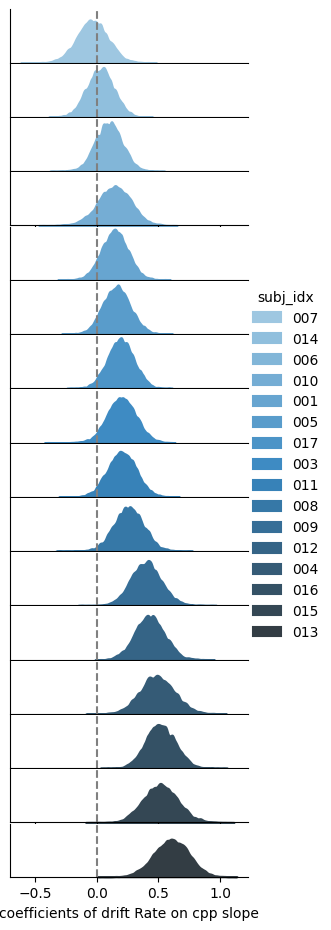

In [11]:
# wide to long
df = pd.melt(slps, value_vars=slps.filter(regex='^v_slp(?!.*std).*sub.*$').columns,value_name='v_slp',var_name='subj_idx')
df = pd.merge(df, df.groupby('subj_idx')['v_slp'].mean().reset_index().rename(columns={'v_slp':'v_slp_mean'}), on='subj_idx')
df.sort_values('v_slp_mean', inplace=True)
df.replace('v_slps_subj.sub-', '', regex=True, inplace=True)
g = sns.FacetGrid(df, 
                  row='subj_idx', 
                  hue='subj_idx', 
                  aspect=5, 
                  height=0.6, 
                  palette='Blues_d', 
                  hue_kws={})
g.map(sns.kdeplot, 
      'v_slp', 
      bw_adjust=.5, 
      clip_on=False, 
      fill=True, 
      alpha=1, 
      linewidth=1.5)
g.add_legend()
g.set_titles("")
g.set(yticks=[])
g.fig.subplots_adjust(hspace=0.02)
#g.despine(left=True)
for ax in g.axes.flatten():
    ax.axvline(x=0, linestyle='--', c='gray')
plt.xlabel('coefficients of drift Rate on cpp slope')
plt.show()
g.savefig('../Figure/v_slps.pdf',dpi=1000)

C:\Users\liuyikang\AppData\Local\Temp\ipykernel_4232\559277938.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df = pd.melt(ams, value_vars=ams.filter(regex='^v_ams(?!.*std).*sub.*$').columns,value_name='v_ams',var_name='subj_idx')
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be

<Figure size 1000x1000 with 0 Axes>

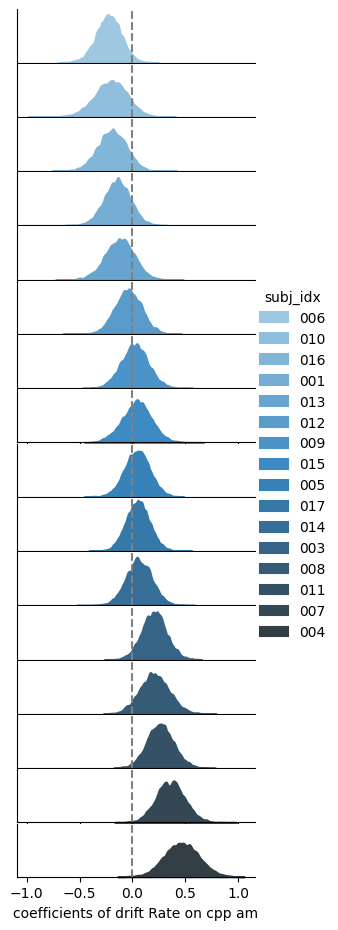

In [12]:
# wide to long
df = pd.melt(ams, value_vars=ams.filter(regex='^v_ams(?!.*std).*sub.*$').columns,value_name='v_ams',var_name='subj_idx')
df = pd.merge(df, df.groupby('subj_idx')['v_ams'].mean().reset_index().rename(columns={'v_ams':'v_ams_mean'}), on='subj_idx')
df.sort_values('v_ams_mean', inplace=True)
df.replace('v_ams_subj.sub-', '', regex=True, inplace=True)
plt.figure(figsize=(10,10))
g = sns.FacetGrid(df, 
                  row='subj_idx', 
                  hue='subj_idx', 
                  aspect=5, 
                  height=0.6, 
                  palette='Blues_d', 
                  hue_kws={})
g.map(sns.kdeplot, 
      'v_ams',
      bw_adjust=.5, 
      clip_on=False, 
      fill=True, 
      alpha=1, 
      linewidth=1.5)
g.add_legend()
g.set_titles("")
g.set(yticks=[])
g.fig.subplots_adjust(hspace=0.02)
#g.despine(left=True)
for ax in g.axes.flatten():
    ax.axvline(x=0, linestyle='--', c='gray')
plt.xlabel('coefficients of drift Rate on cpp am')
plt.show()
g.savefig('../Figure/v_ams.pdf',dpi=1000)

C:\Users\liuyikang\AppData\Local\Temp\ipykernel_4232\2906790734.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df = pd.melt(pams, value_vars=pams.filter(regex='^v_pams(?!.*std).*sub.*$').columns,value_name='v_pams',var_name='subj_idx')
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and wi

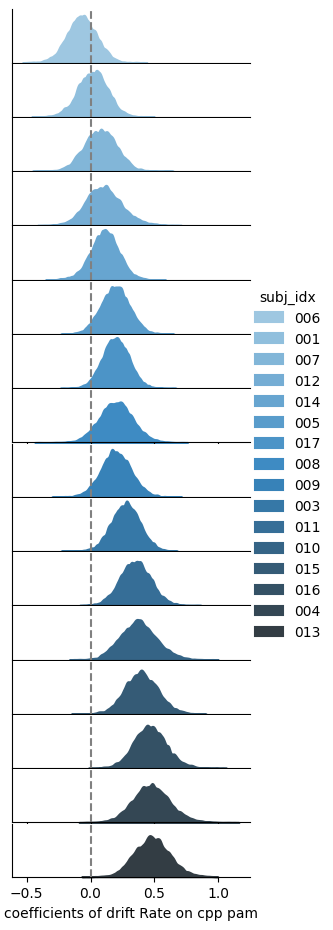

In [13]:
# wide to long
df = pd.melt(pams, value_vars=pams.filter(regex='^v_pams(?!.*std).*sub.*$').columns,value_name='v_pams',var_name='subj_idx')
df = pd.merge(df, df.groupby('subj_idx')['v_pams'].mean().reset_index().rename(columns={'v_pams':'v_pams_mean'}), on='subj_idx')
df.sort_values('v_pams_mean', inplace=True)
df.replace('v_pams_subj.sub-', '', regex=True, inplace=True)
g = sns.FacetGrid(df, 
                  row='subj_idx', 
                  hue='subj_idx', 
                  aspect=5, 
                  height=0.6, 
                  palette='Blues_d', 
                  hue_kws={})
g.map(sns.kdeplot, 
      'v_pams',
      bw_adjust=.5, 
      clip_on=False, 
      fill=True, 
      alpha=1, 
      linewidth=1.5)
g.add_legend()
g.set_titles("")
g.set(yticks=[])
g.fig.subplots_adjust(hspace=0.02)
#g.despine(left=True)
for ax in g.axes.flatten():
    ax.axvline(x=0, linestyle='--', c='gray')
plt.xlabel('coefficients of drift Rate on cpp pam')
plt.show()
g.savefig('../Figure/v_pams.pdf',dpi=1000)

C:\Users\liuyikang\AppData\Local\Temp\ipykernel_4232\1326965878.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df = pd.melt(slp_bin, value_vars=slp_bin.filter(regex='^v_slp(?!.*std).*sub.*$').columns,value_name='v_slp_bin',var_name='subj_idx')
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecate

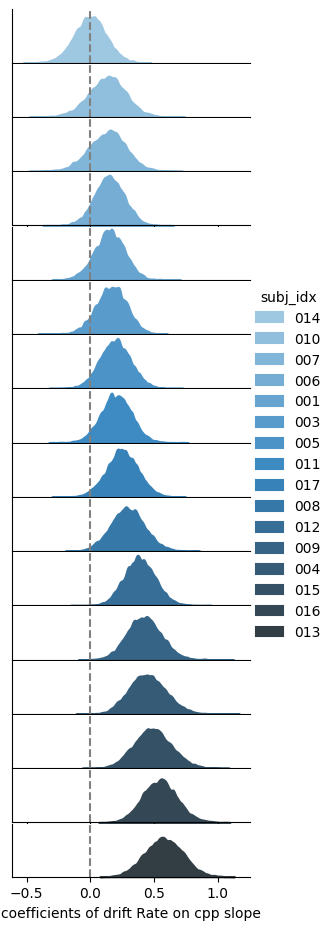

In [14]:
# wide to long
df = pd.melt(slp_bin, value_vars=slp_bin.filter(regex='^v_slp(?!.*std).*sub.*$').columns,value_name='v_slp_bin',var_name='subj_idx')
df = pd.merge(df, df.groupby('subj_idx')['v_slp_bin'].mean().reset_index().rename(columns={'v_slp_bin':'v_slp_bin_mean'}), on='subj_idx')
df.sort_values('v_slp_bin_mean', inplace=True)
df.replace('v_slp_bin_subj.sub-', '', regex=True, inplace=True)
g = sns.FacetGrid(df,
                    row='subj_idx',
                    hue='subj_idx',
                    aspect=5,
                    height=0.6,
                    palette='Blues_d',
                    hue_kws={})
g.map(sns.kdeplot,
        'v_slp_bin',
        bw_adjust=.5,
        clip_on=False,
        fill=True,
        alpha=1,
        linewidth=1.5)
g.add_legend()
g.set_titles("")
g.set(yticks=[])
g.fig.subplots_adjust(hspace=0.02)
#g.despine(left=True)
for ax in g.axes.flatten():
    ax.axvline(x=0, linestyle='--', c='gray')
plt.xlabel('coefficients of drift Rate on cpp slope')
plt.show()
g.savefig('../Figure/v_slp_bin.pdf',dpi=1000)

C:\Users\liuyikang\AppData\Local\Temp\ipykernel_4232\3903861966.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df = pd.melt(am_bin, value_vars=am_bin.filter(regex='^v_am(?!.*std).*sub.*$').columns,value_name='v_am_bin',var_name='subj_idx')
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated an

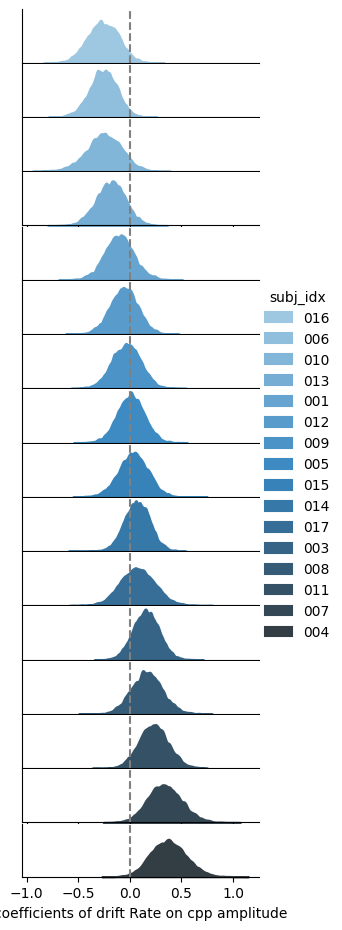

In [15]:
# wide to long
df = pd.melt(am_bin, value_vars=am_bin.filter(regex='^v_am(?!.*std).*sub.*$').columns,value_name='v_am_bin',var_name='subj_idx')
df = pd.merge(df, df.groupby('subj_idx')['v_am_bin'].mean().reset_index().rename(columns={'v_am_bin':'v_am_bin_mean'}), on='subj_idx')
df.sort_values('v_am_bin_mean', inplace=True)
df.replace('v_am_bin_subj.sub-', '', regex=True, inplace=True)
g = sns.FacetGrid(df,
                    row='subj_idx',
                    hue='subj_idx',
                    aspect=5,
                    height=0.6,
                    palette='Blues_d',
                    hue_kws={})
g.map(sns.kdeplot,
        'v_am_bin',
        bw_adjust=.5,
        clip_on=False,
        fill=True,
        alpha=1,
        linewidth=1.5)
g.add_legend()
g.set_titles("")
g.set(yticks=[])
g.fig.subplots_adjust(hspace=0.02)
#g.despine(left=True)
for ax in g.axes.flatten():
    ax.axvline(x=0, linestyle='--', c='gray')
plt.xlabel('coefficients of drift Rate on cpp amplitude')
plt.show()
g.savefig('../Figure/v_am_bin.pdf',dpi=1000)

C:\Users\liuyikang\AppData\Local\Temp\ipykernel_4232\566553025.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df = pd.melt(pam_bin, value_vars=pam_bin.filter(regex='^v_pam(?!.*std).*sub.*$').columns,value_name='v_pam_bin',var_name='subj_idx')
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated

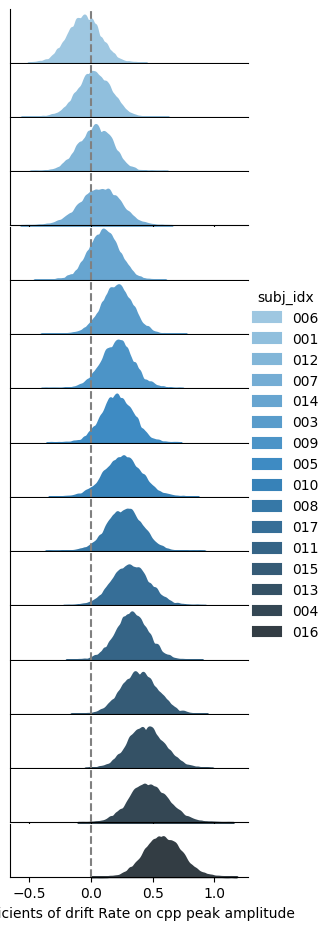

In [16]:
# wide to long
df = pd.melt(pam_bin, value_vars=pam_bin.filter(regex='^v_pam(?!.*std).*sub.*$').columns,value_name='v_pam_bin',var_name='subj_idx')
df = pd.merge(df, df.groupby('subj_idx')['v_pam_bin'].mean().reset_index().rename(columns={'v_pam_bin':'v_pam_bin_mean'}), on='subj_idx')
df.sort_values('v_pam_bin_mean', inplace=True)
df.replace('v_pam_bin_subj.sub-', '', regex=True, inplace=True)

g = sns.FacetGrid(df,
                    row='subj_idx',
                    hue='subj_idx',
                    aspect=5,
                    height=0.6,
                    palette='Blues_d',
                    hue_kws={})
g.map(sns.kdeplot,
        'v_pam_bin',
        bw_adjust=.5,
        clip_on=False,
        fill=True,
        alpha=1,
        linewidth=1.5)
g.add_legend()
g.set_titles("")
g.set(yticks=[])
g.fig.subplots_adjust(hspace=0.02)
#g.despine(left=True)
for ax in g.axes.flatten():
    ax.axvline(x=0, linestyle='--', c='gray')
plt.xlabel('coefficients of drift Rate on cpp peak amplitude')
plt.show()
g.savefig('../Figure/v_pam_bin.pdf',dpi=1000)

C:\Users\liuyikang\AppData\Local\Temp\ipykernel_4232\515733357.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df = pd.melt(slp_cond, value_vars=slp_cond.filter(regex='^v_slp(?!.*std).*sub.*$').columns,value_name='v_slp_cond',var_name='subj_idx')
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is depreca

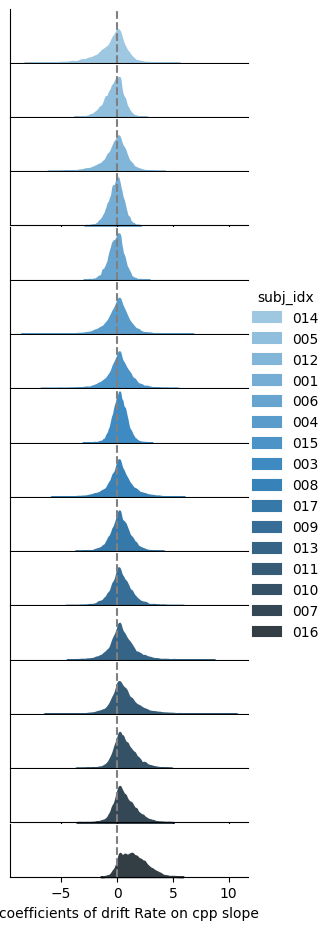

In [17]:
# wide to long
df = pd.melt(slp_cond, value_vars=slp_cond.filter(regex='^v_slp(?!.*std).*sub.*$').columns,value_name='v_slp_cond',var_name='subj_idx')
df = pd.merge(df, df.groupby('subj_idx')['v_slp_cond'].mean().reset_index().rename(columns={'v_slp_cond':'v_slp_cond_mean'}), on='subj_idx')
df.sort_values('v_slp_cond_mean', inplace=True)
df.replace('v_slp_cond_subj.sub-', '', regex=True, inplace=True)
g = sns.FacetGrid(df,
                    row='subj_idx',
                    hue='subj_idx',
                    aspect=5,
                    height=0.6,
                    palette='Blues_d',
                    hue_kws={})
g.map(sns.kdeplot,
        'v_slp_cond',
        bw_adjust=.5,
        clip_on=False,
        fill=True,
        alpha=1,
        linewidth=1.5)
g.add_legend()
g.set_titles("")
g.set(yticks=[])
g.fig.subplots_adjust(hspace=0.02)
#g.despine(left=True)
for ax in g.axes.flatten():
    ax.axvline(x=0, linestyle='--', c='gray')
plt.xlabel('coefficients of drift Rate on cpp slope')
plt.show()
g.savefig('../Figure/v_slp_cond.pdf',dpi=1000)

C:\Users\liuyikang\AppData\Local\Temp\ipykernel_4232\3992334721.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df = pd.melt(am_cond, value_vars=am_cond.filter(regex='^v_am(?!.*std).*sub.*$').columns,value_name='v_am_cond',var_name='subj_idx')
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated

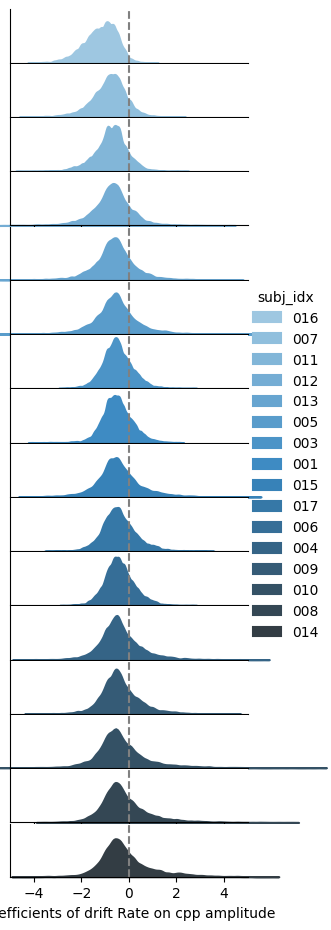

In [18]:
# wide to long
df = pd.melt(am_cond, value_vars=am_cond.filter(regex='^v_am(?!.*std).*sub.*$').columns,value_name='v_am_cond',var_name='subj_idx')
df = pd.merge(df, df.groupby('subj_idx')['v_am_cond'].mean().reset_index().rename(columns={'v_am_cond':'v_am_cond_mean'}), on='subj_idx')
df.sort_values('v_am_cond_mean', inplace=True)
df.replace('v_am_cond_subj.sub-', '', regex=True, inplace=True)
g = sns.FacetGrid(df,
                    row='subj_idx',
                    hue='subj_idx',
                    aspect=5,
                    height=0.6,
                    palette='Blues_d',
                    hue_kws={})
g.map(sns.kdeplot,
        'v_am_cond',
        bw_adjust=.5,
        clip_on=False,
        fill=True,
        alpha=1,
        linewidth=1.5)
g.add_legend()
g.set_titles("")
g.set(yticks=[])
g.fig.subplots_adjust(hspace=0.02)
#g.despine(left=True)
for ax in g.axes.flatten():
    ax.axvline(x=0, linestyle='--', c='gray')
plt.xlabel('coefficients of drift Rate on cpp amplitude')
plt.xlim(-5,5)
plt.show()
g.savefig('../Figure/v_am_cond.pdf',dpi=1000)

C:\Users\liuyikang\AppData\Local\Temp\ipykernel_4232\2870845509.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df = pd.melt(pam_cond, value_vars=pam_cond.filter(regex='^v_pam(?!.*std).*sub.*$').columns,value_name='v_pam_cond',var_name='subj_idx')
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprec

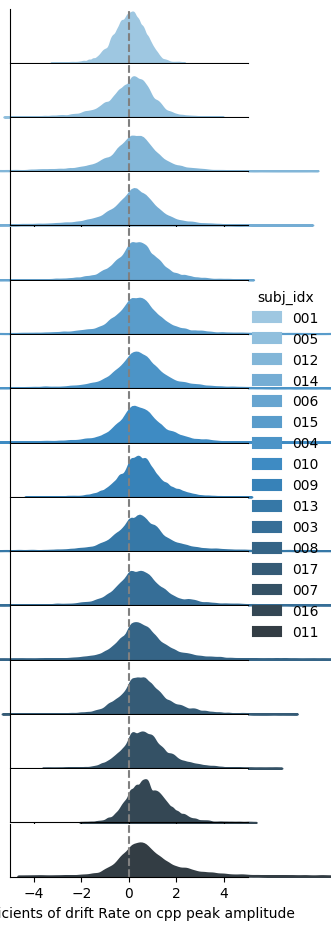

In [19]:
# wide to long
df = pd.melt(pam_cond, value_vars=pam_cond.filter(regex='^v_pam(?!.*std).*sub.*$').columns,value_name='v_pam_cond',var_name='subj_idx')
df = pd.merge(df, df.groupby('subj_idx')['v_pam_cond'].mean().reset_index().rename(columns={'v_pam_cond':'v_pam_cond_mean'}), on='subj_idx')
df.sort_values('v_pam_cond_mean', inplace=True)
df.replace('v_pam_cond_subj.sub-', '', regex=True, inplace=True)
g = sns.FacetGrid(df,
                    row='subj_idx',
                    hue='subj_idx',
                    aspect=5,
                    height=0.6,
                    palette='Blues_d',
                    hue_kws={})
g.map(sns.kdeplot,
        'v_pam_cond',
        bw_adjust=.5,
        clip_on=False,
        fill=True,
        alpha=1,
        linewidth=1.5)
g.add_legend()
g.set_titles("")
g.set(yticks=[])
g.fig.subplots_adjust(hspace=0.02)
#g.despine(left=True)
for ax in g.axes.flatten():
    ax.axvline(x=0, linestyle='--', c='gray')
plt.xlabel('coefficients of drift Rate on cpp peak amplitude')
plt.xlim(-5,5)
plt.show()
g.savefig('../Figure/v_pam_cond.pdf',dpi=1000)

d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iterite

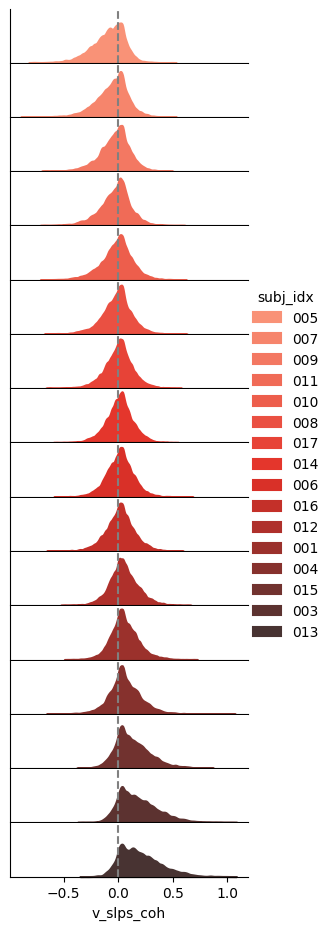

In [11]:
df = pd.melt(slps, value_vars=slps.filter(regex='^v_.*:(?!.*std).*sub.*$').columns,value_name='v_slps_coh',var_name='subj_idx')
df = pd.merge(df, df.groupby('subj_idx')['v_slps_coh'].mean().reset_index().rename(columns={'v_slps_coh':'v_slps_coh_mean'}), on='subj_idx')
df.sort_values('v_slps_coh_mean', inplace=True)
df.replace("v_C\(coherence, Treatment\('low'\)\)\[T\.high\]:slps_subj.sub-", '', regex=True, inplace=True)

g = sns.FacetGrid(df,
                    row='subj_idx',
                    hue='subj_idx',
                    aspect=5,
                    height=0.6,
                    palette='Reds_d',
                    hue_kws={})
g.map(sns.kdeplot,
        'v_slps_coh',
        bw_adjust=.5,
        clip_on=False,
        fill=True,
        alpha=1,
        linewidth=1.5)
g.add_legend()
g.set_titles("")
g.set(yticks=[])
g.fig.subplots_adjust(hspace=0.02)
#g.despine(left=True)
for ax in g.axes.flatten():
    ax.axvline(x=0, linestyle='--', c='gray')



plt.show()

g.savefig('../Figure/v_slps_coh.pdf',dpi=1000)

d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iterite

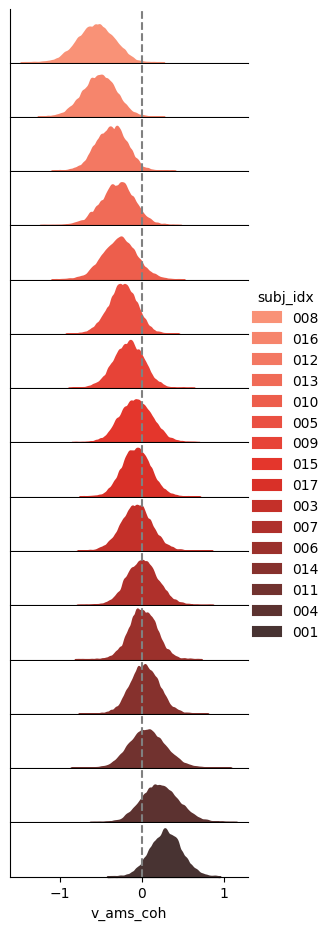

In [12]:
df = pd.melt(ams, value_vars=ams.filter(regex='^v_.*:(?!.*std).*sub.*$').columns,value_name='v_ams_coh',var_name='subj_idx')
df = pd.merge(df, df.groupby('subj_idx')['v_ams_coh'].mean().reset_index().rename(columns={'v_ams_coh':'v_ams_coh_mean'}), on='subj_idx')
df.sort_values('v_ams_coh_mean', inplace=True)
df.replace("v_C\(coherence, Treatment\('low'\)\)\[T\.high\]:ams_subj.sub-", '', regex=True, inplace=True)

g = sns.FacetGrid(df,
                    row='subj_idx',
                    hue='subj_idx',
                    aspect=5,
                    height=0.6,
                    palette='Reds_d',
                    hue_kws={})
g.map(sns.kdeplot,
        'v_ams_coh',
        bw_adjust=.5,
        clip_on=False,
        fill=True,
        alpha=1,
        linewidth=1.5)
g.add_legend()
g.set_titles("")
g.set(yticks=[])
g.fig.subplots_adjust(hspace=0.02)
#g.despine(left=True)
for ax in g.axes.flatten():
    ax.axvline(x=0, linestyle='--', c='gray')
plt.show()
g.savefig('../Figure/v_ams_coh.pdf',dpi=1000)

d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iterite

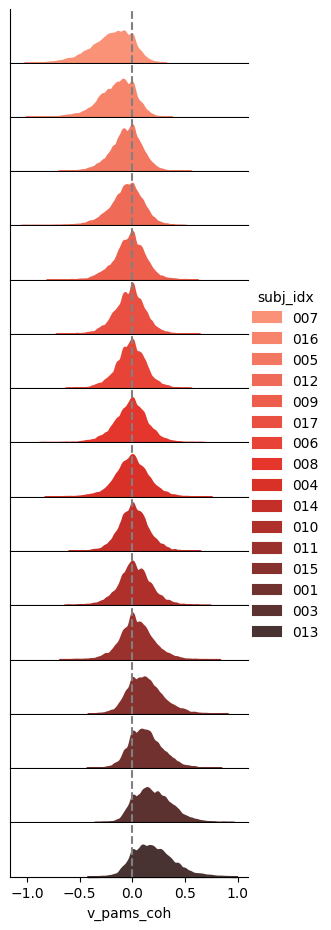

In [13]:
df = pd.melt(pams, value_vars=pams.filter(regex='^v_.*:(?!.*std).*sub.*$').columns,value_name='v_pams_coh',var_name='subj_idx')
df = pd.merge(df, df.groupby('subj_idx')['v_pams_coh'].mean().reset_index().rename(columns={'v_pams_coh':'v_pams_coh_mean'}), on='subj_idx')
df.sort_values('v_pams_coh_mean', inplace=True)
df.replace("v_C\(coherence, Treatment\('low'\)\)\[T\.high\]:pams_subj.sub-", '', regex=True, inplace=True)

g = sns.FacetGrid(df,
                    row='subj_idx',
                    hue='subj_idx',
                    aspect=5,
                    height=0.6,
                    palette='Reds_d',
                    hue_kws={})
g.map(sns.kdeplot,
        'v_pams_coh',
        bw_adjust=.5,
        clip_on=False,
        fill=True,
        alpha=1,
        linewidth=1.5)
g.add_legend()
g.set_titles("")
g.set(yticks=[])
g.fig.subplots_adjust(hspace=0.02)
#g.despine(left=True)
for ax in g.axes.flatten():
    ax.axvline(x=0, linestyle='--', c='gray')
plt.show()
g.savefig('../Figure/v_pams_coh.pdf',dpi=1000)

C:\Users\liuyikang\AppData\Local\Temp\ipykernel_4232\2361439960.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df = pd.melt(slp_bin, value_vars=slp_bin.filter(regex='^v_.*:(?!.*std).*sub.*$').columns,value_name='v_slp_bin',var_name='subj_idx')
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecate

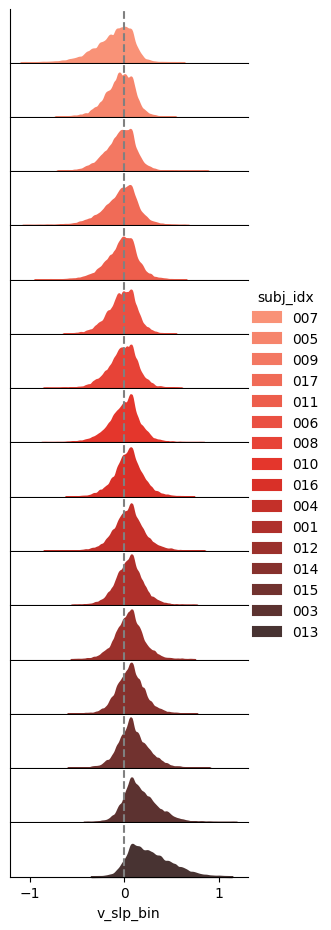

In [23]:
df = pd.melt(slp_bin, value_vars=slp_bin.filter(regex='^v_.*:(?!.*std).*sub.*$').columns,value_name='v_slp_bin',var_name='subj_idx')
df = pd.merge(df, df.groupby('subj_idx')['v_slp_bin'].mean().reset_index().rename(columns={'v_slp_bin':'v_slp_bin_mean'}), on='subj_idx')
df.sort_values('v_slp_bin_mean', inplace=True)
df.replace("v_C\(coherence, Treatment\('low'\)\)\[T\.high\]:slp_bin_subj.sub-", '', regex=True, inplace=True)

g = sns.FacetGrid(df,
                    row='subj_idx',
                    hue='subj_idx',
                    aspect=5,
                    height=0.6,
                    palette='Reds_d',
                    hue_kws={})
g.map(sns.kdeplot,
        'v_slp_bin',
        bw_adjust=.5,
        clip_on=False,
        fill=True,
        alpha=1,
        linewidth=1.5)
g.add_legend()
g.set_titles("")
g.set(yticks=[])
g.fig.subplots_adjust(hspace=0.02)
#g.despine(left=True)
for ax in g.axes.flatten():
    ax.axvline(x=0, linestyle='--', c='gray')
plt.show()
g.savefig('../Figure/v_slp_coh_bin.pdf',dpi=1000)

d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iterite

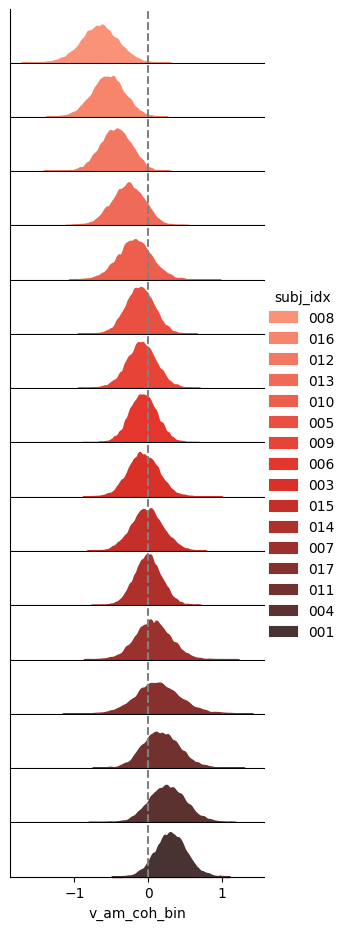

In [25]:
df = pd.melt(am_bin, value_vars=am_bin.filter(regex='^v_.*:(?!.*std).*sub.*$').columns,value_name='v_am_coh_bin',var_name='subj_idx')
df = pd.merge(df, df.groupby('subj_idx')['v_am_coh_bin'].mean().reset_index().rename(columns={'v_am_coh_bin':'v_am_coh_bin_mean'}), on='subj_idx')
df.sort_values('v_am_coh_bin_mean', inplace=True)
df.replace("v_C\(coherence, Treatment\('low'\)\)\[T\.high\]:am_bin_subj.sub-","", regex=True,inplace=True)

g = sns.FacetGrid(df,
                    row='subj_idx',
                    hue='subj_idx',
                    aspect=5,
                    height=0.6,
                    palette='Reds_d',
                    hue_kws={})
g.map(sns.kdeplot,
        'v_am_coh_bin',
        bw_adjust=.5,
        clip_on=False,
        fill=True,
        alpha=1,
        linewidth=1.5)
g.add_legend()
g.set_titles("")
g.set(yticks=[])
g.fig.subplots_adjust(hspace=0.02)
#g.despine(left=True)
for ax in g.axes.flatten():
    ax.axvline(x=0, linestyle='--', c='gray')
plt.show()
g.savefig('../Figure/v_am_bin.pdf',dpi=1000)

d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iterite

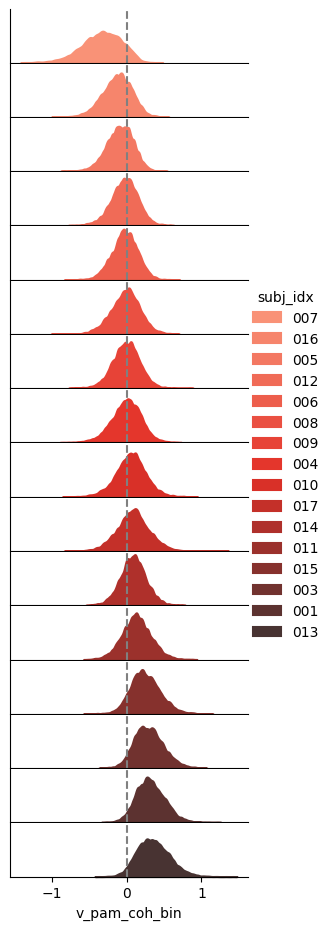

In [26]:
df = pd.melt(pam_bin, value_vars=pam_bin.filter(regex='^v_.*:(?!.*std).*sub.*$').columns,value_name='v_pam_coh_bin',var_name='subj_idx')
df = pd.merge(df, df.groupby('subj_idx')['v_pam_coh_bin'].mean().reset_index().rename(columns={'v_pam_coh_bin':'v_pam_coh_bin_mean'}), on='subj_idx')
df.sort_values('v_pam_coh_bin_mean', inplace=True)
df.replace("v_C\(coherence, Treatment\('low'\)\)\[T\.high\]:pam_bin_subj.sub-","", regex=True,inplace=True)
g = sns.FacetGrid(df,
                    row='subj_idx',
                    hue='subj_idx',
                    aspect=5,
                    height=0.6,
                    palette='Reds_d',
                    hue_kws={})
g.map(sns.kdeplot,
        'v_pam_coh_bin',
        bw_adjust=.5,
        clip_on=False,
        fill=True,
        alpha=1,
        linewidth=1.5)
g.add_legend()
g.set_titles("")
g.set(yticks=[])
g.fig.subplots_adjust(hspace=0.02)
#g.despine(left=True)
for ax in g.axes.flatten():
    ax.axvline(x=0, linestyle='--', c='gray')
plt.show()
g.savefig('../Figure/v_pam_coh_bin.pdf',dpi=1000)

d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iterite

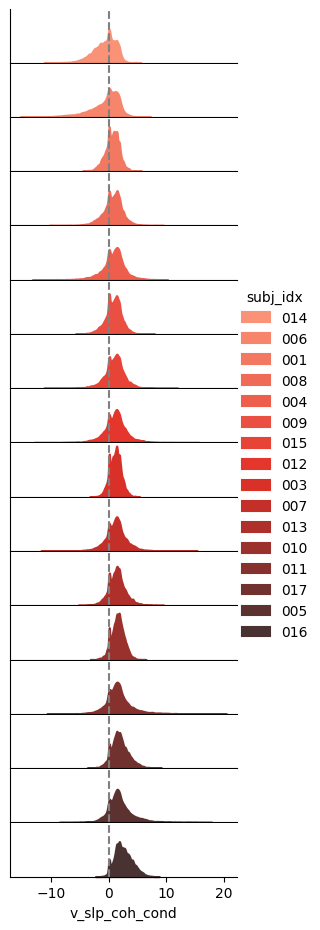

In [14]:
df = pd.melt(slp_cond, value_vars=slp_cond.filter(regex='^v_.*:(?!.*std).*sub.*$').columns,value_name='v_slp_coh_cond',var_name='subj_idx')
df = pd.merge(df, df.groupby('subj_idx')['v_slp_coh_cond'].mean().reset_index().rename(columns={'v_slp_coh_cond':'v_slp_coh_cond_mean'}), on='subj_idx')
df.sort_values('v_slp_coh_cond_mean', inplace=True)
df.replace("v_C\(coherence, Treatment\('low'\)\)\[T\.high\]:slp_cond_subj.sub-","", regex=True,inplace=True)
g = sns.FacetGrid(df,
                    row='subj_idx',
                    hue='subj_idx',
                    aspect=5,
                    height=0.6,
                    palette='Reds_d',
                    hue_kws={})
g.map(sns.kdeplot,
        'v_slp_coh_cond',
        bw_adjust=.5,
        clip_on=False,
        fill=True,
        alpha=1,
        linewidth=1.5)
g.add_legend()
g.set_titles("")
g.set(yticks=[])
g.fig.subplots_adjust(hspace=0.02)
#g.despine(left=True)
for ax in g.axes.flatten():
    ax.axvline(x=0, linestyle='--', c='gray')
plt.show()
g.savefig('../Figure/v_slp_coh_cond.pdf',dpi=1000)

d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iterite

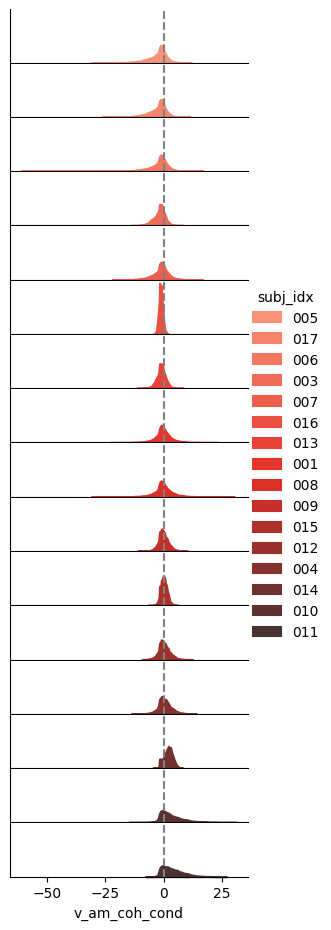

In [4]:
df = pd.melt(am_cond, value_vars=am_cond.filter(regex='^v_.*:(?!.*std).*sub.*$').columns,value_name='v_am_coh_cond',var_name='subj_idx')
df = pd.merge(df, df.groupby('subj_idx')['v_am_coh_cond'].mean().reset_index().rename(columns={'v_am_coh_cond':'v_am_coh_cond_mean'}), on='subj_idx')
df.sort_values('v_am_coh_cond_mean', inplace=True)
df.replace("v_C\(coherence, Treatment\('low'\)\)\[T\.high\]:am_cond_subj.sub-","", regex=True,inplace=True)
g = sns.FacetGrid(df,
                    row='subj_idx',
                    hue='subj_idx',
                    aspect=5,
                    height=0.6,
                    palette='Reds_d',
                    hue_kws={})
g.map(sns.kdeplot,
        'v_am_coh_cond',
        bw_adjust=.5,
        clip_on=False,
        fill=True,
        alpha=1,
        linewidth=1.5)
g.add_legend()
g.set_titles("")
g.set(yticks=[])
g.fig.subplots_adjust(hspace=0.02)
#g.despine(left=True)
for ax in g.axes.flatten():
    ax.axvline(x=0, linestyle='--', c='gray')
plt.show()
g.savefig('../Figure/v_am_coh_cond.pdf',dpi=1000)

d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Anaconda\envs\CPPmultiverse\lib\site-packages\seaborn\axisgrid.py:677: FutureWarning: iterite

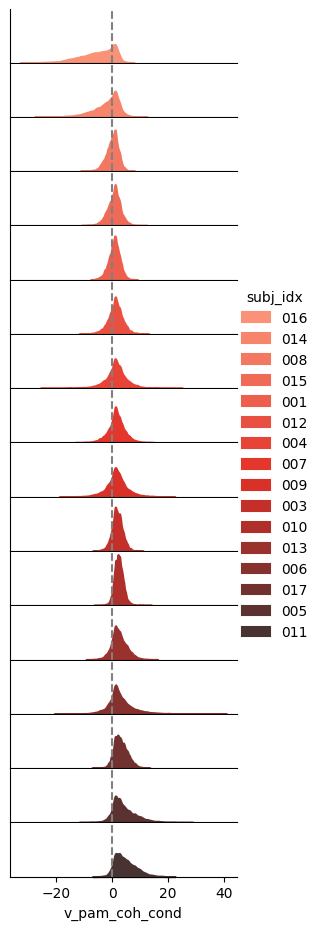

In [29]:
df = pd.melt(pam_cond, value_vars=pam_cond.filter(regex='^v_.*:(?!.*std).*sub.*$').columns,value_name='v_pam_coh_cond',var_name='subj_idx')
df = pd.merge(df, df.groupby('subj_idx')['v_pam_coh_cond'].mean().reset_index().rename(columns={'v_pam_coh_cond':'v_pam_coh_cond_mean'}), on='subj_idx')
df.sort_values('v_pam_coh_cond_mean', inplace=True)
df.replace("v_C\(coherence, Treatment\('low'\)\)\[T\.high\]:pam_cond_subj.sub-","", regex=True,inplace=True)
g = sns.FacetGrid(df,
                    row='subj_idx',
                    hue='subj_idx',
                    aspect=5,
                    height=0.6,
                    palette='Reds_d',
                    hue_kws={})
g.map(sns.kdeplot,
        'v_pam_coh_cond',
        bw_adjust=.5,
        clip_on=False,
        fill=True,
        alpha=1,
        linewidth=1.5)
g.add_legend()
g.set_titles("")
g.set(yticks=[])
g.fig.subplots_adjust(hspace=0.02)
#g.despine(left=True)
for ax in g.axes.flatten():
    ax.axvline(x=0, linestyle='--', c='gray')
plt.show()
g.savefig('../Figure/v_pam_coh_cond.pdf',dpi=1000)